# Part I - (Loan Data From Prosper)
## by (Mariam Fayena)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
>  [ All column information](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)



## Preliminary Wrangling


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [44]:
# read the data set in to data frame
df=pd.read_csv('prosperLoanData.csv')


In [45]:
print(df.head())
print(df.info())
print(df.shape)
print(df.describe())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

#### saving the data that are needed for this analysis into a data frame

In [46]:
# creating a data frame for the columns that are needed in this analysis
columns=['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate']
loan_data=df[columns]

In [47]:
# loading the data head
print(loan_data.info())
loan_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   BorrowerState              108422 non-null  object 
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  IncomeRange                113937 non-null  object 
 13  LoanOriginalAmount         11

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00
2,81716,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Other,Not available,False,Not displayed,3001,2007-01-17 00:00:00
3,658116,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,D,4.0,2,MN,Executive,Employed,True,"$100,000+",15000,2013-09-20 00:00:00


In [48]:
# making a copy of the data set
loan=loan_data.copy()

### Data wrangling
* performing some cleaning to make the data set applicable when visualizing

In [49]:
loan

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate
0,193129,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,True,"$25,000-49,999",9425,2007-09-12 00:00:00
1,1209647,36,Current,0.12016,0.0920,A,7.0,2,CO,Professional,Employed,False,"$50,000-74,999",10000,2014-03-03 00:00:00
2,81716,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,Other,Not available,False,Not displayed,3001,2007-01-17 00:00:00
3,658116,36,Current,0.12528,0.0974,A,9.0,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",10000,2012-11-01 00:00:00
4,909464,36,Current,0.24614,0.2085,D,4.0,2,MN,Executive,Employed,True,"$100,000+",15000,2013-09-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,Current,0.22354,0.1864,C,5.0,1,IL,Food Service Management,Employed,True,"$50,000-74,999",10000,2013-04-22 00:00:00
113933,537216,36,FinalPaymentInProgress,0.13220,0.1110,A,8.0,7,PA,Professional,Employed,True,"$75,000-99,999",2000,2011-11-07 00:00:00
113934,1069178,60,Current,0.23984,0.2150,D,3.0,1,TX,Other,Employed,True,"$25,000-49,999",10000,2013-12-23 00:00:00
113935,539056,60,Completed,0.28408,0.2605,C,5.0,2,GA,Food Service,Full-time,True,"$25,000-49,999",15000,2011-11-21 00:00:00


In [50]:
# checking for null values form the data set
loan[['BorrowerAPR','BorrowerRate','LoanOriginalAmount']].isnull().value_counts()

BorrowerAPR  BorrowerRate  LoanOriginalAmount
False        False         False                 113912
True         False         False                     25
dtype: int64

> since it just only the borrowerAPR that has null values and they are not affected by thr intrest rate or amount. the values wil be left and not drop as an empty list.

In [51]:
# changing loan origination date to date type data
loan['LoanOriginationDate']=loan.loc[:,'LoanOriginationDate'].apply(pd.to_datetime, errors='coerce')

In [52]:
# renaming the coulmn names
loan=loan.rename(columns={"ProsperRating (Alpha)":"ProsperRating","ListingCategory (numeric)":"ListingCategory"})

In [53]:
# creating a new column if they meet the category conditions
# create an empty list
category= []
# created a loop which will iterate over all the rows in column 'listingCategory' and assign values in the list if the condition is meet
for row in loan['ListingCategory']:
    if row == 0: category.append('Not available')
    elif row == 1: category.append('Debt Consolidation')
    elif row == 2: category.append('Home Improvement')
    elif row == 3: category.append('Business')
    elif row == 4: category.append('Personal Loan')
    elif row == 5: category.append('Student Use')
    elif row == 6: category.append('Auto')
    elif row == 7: category.append('Other')
    elif row == 8: category.append('Baby&Adoption')
    elif row == 9: category.append('Boat')
    elif row == 10: category.append('Cosmetic Procedure')
    elif row == 11: category.append('Engagement Ring')
    elif row == 12: category.append('Green Loans')
    elif row == 13: category.append('Household Expenses')
    elif row == 14: category.append('Large Purchases')
    elif row == 15: category.append('Medical/Dental')
    elif row == 16: category.append('Motorcycle')
    elif row == 17: category.append('RV')
    elif row == 18: category.append('Taxes')
    elif row == 19: category.append('Vacation')
    else: category.append('Wedding Loans')
    
 # store the append values into a new column in the loan data frame  
                                
loan['Listing_category']=category          


            
        

In [54]:
# droping the former columns
loan=loan.drop('ListingCategory',axis=1)

### What is the structure of your dataset?

> The main data set contain 113937 row and 81 columns. But for my analysis i wou;d be working with 113937 row and 15 column which inclues:
* ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.				
* Term: The length of the loan expressed in months.	
* LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.	
* BorrowerRate: The Borrower's interest rate for this loan. 	
* ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.	
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
* BorrowerState:	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.																		
* Occupation: The Occupation selected by the Borrower at the time they created the listing.		
* EmploymentStatus:The employment status of the borrower at the time they posted the listing.
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* IncomeRange: The income range of the borrower at the time the listing was created.
* LoanOriginalAmount: The origination amount of the loan.																	
* LoanOriginationDate: The date the loan was originated.		
* Listing_category: The category of the listing that the borrower selected when posting their listing


### What is/are the main feature(s) of interest in your dataset?

* BorrowerAPR
* BorrowerRate
* ProsperRating although it only for data set after july 2019
> More info on the Interest Rate vs. APR Meaning: Knowing the Difference here
 [ Knowing the Difference here](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp)
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* EmploymentStatus
* LoanOriginalAmount
* IncomeRange
* IsBorrowerHomeowner

## Univariate Exploration




In [55]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperScore,LoanOriginalAmount
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,113937.00000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,8337.01385
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,6245.80058
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,1000.00000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,4000.00000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,6500.00000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,12000.00000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,35000.00000


In [56]:
# creating a fuction for ploting my histigram for univariate plots.
def hist_plot(df,x_value,bin):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    bin: the bin size one need for ploting
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    plt.hist(data = df, x = x_value, bins = bin);
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

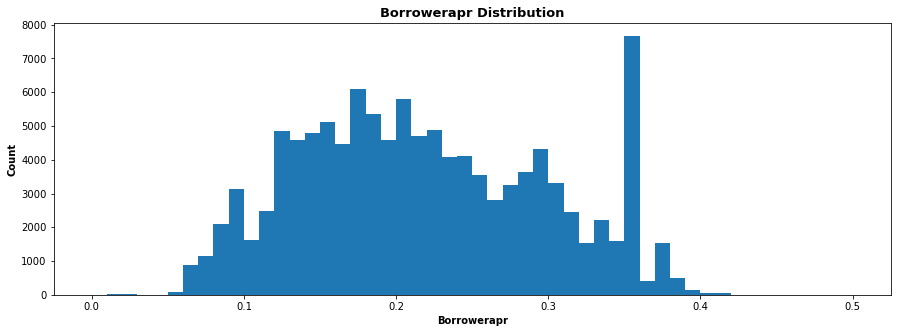

In [57]:
# plotting the borrower rate with my function
hist_plot(loan,'BorrowerAPR',bin = np.arange(0, 0.5+0.01, 0.01))


* The plot shows that the 'BorrowerAPR' is a multimodal plot. With the first peak around 0.1, a gradual increase towards 2.0 which is in between the second and third peaks, and decreases towards the fourth peak in 0.3. A spike occurred towards 0.4 having the largest count of about 8,000. The borrower's APR  % rate is distributed just around 0.1 and 0.4.
* I hope to see a lower value in the interest rate since the APR is always higher than the interest rate due to the additional costs or fees

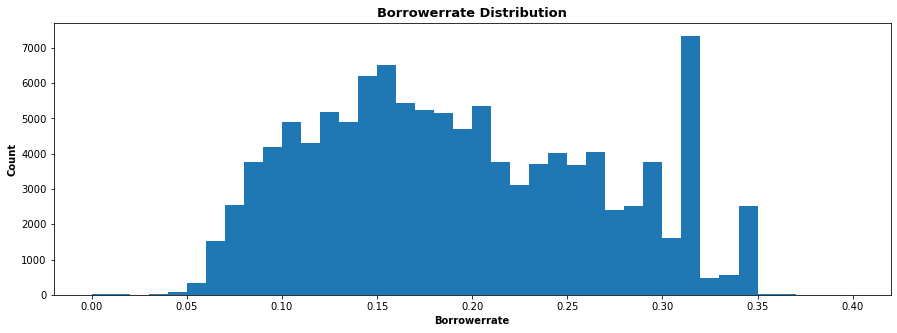

In [58]:
# using my function to plot my borrower rate distribution 
hist_plot(loan,'BorrowerRate',bin = np.arange(0, 0.4+0.01, 0.01))

* The BorrowerRate plot shows almost the same distribution as the Borrower APR, with it highest peak slightly above 0.3 of about 7000 count this what i expected since the BorrowerRate and other due rate when added  make up the Borrower APR.

In [59]:
np.log10(loan['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

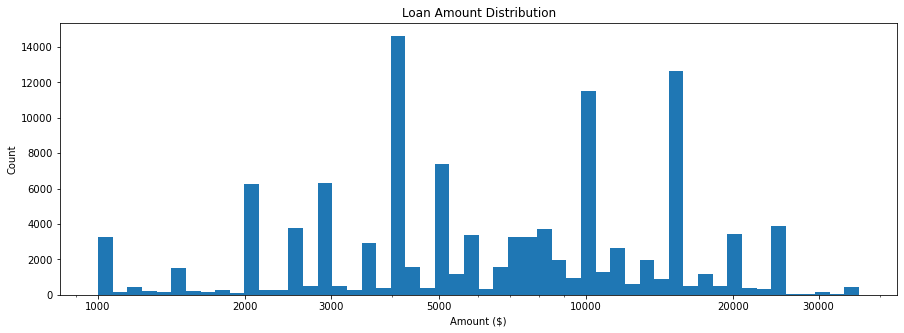

In [60]:
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+0.03, 0.03)
# setting fig size
plt.figure(figsize = [15, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
ticks = [1000,2000,3000,5000,10000,20000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')
plt.xticks(ticks, labels);


* The loan amount distribution is multimodal and starts from 1000, with its highest peak at about 5000.
* This shows that the amount the borrowers collected is widely distributed, between 1000 and slight above 30000 dollars

In [61]:
# creating a fuction for ploting my count plot with x variable.
def count_xplot(df,x_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, x = x_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{x_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.ylabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.xlabel(x_value.title(),fontsize=10,weight=("bold"))

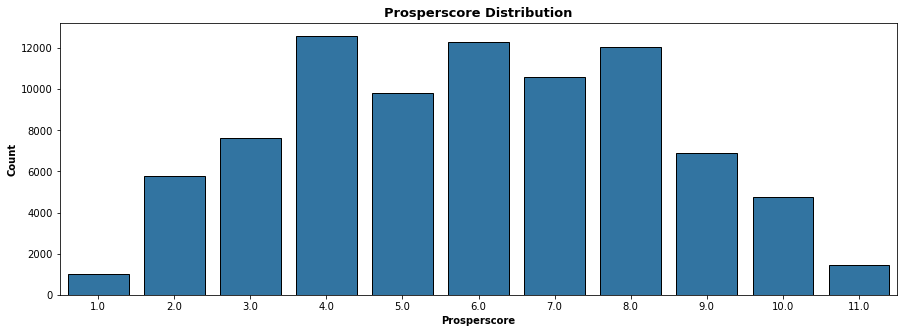

In [62]:
# using the function count xplot 
count_xplot(loan,'ProsperScore')

* the prosper Score distrbution  showed that it is multimodal, with score 4 having the highest count of about 1200,followed by 6 and 8. the lowest count score is 1. showing that more individuals where giving a good prosper score rating.

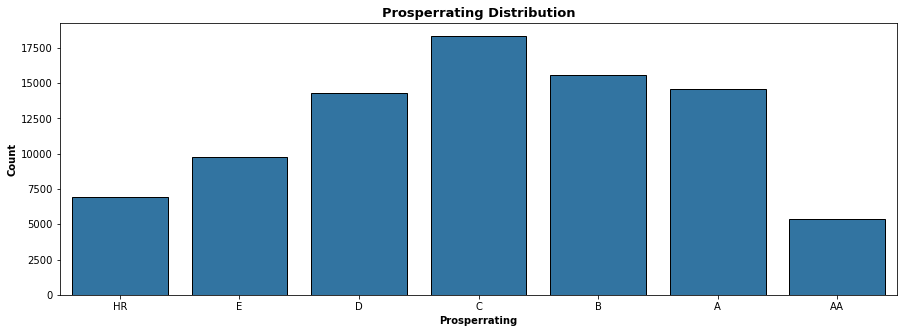

In [63]:
# seting the rating prosper rating order
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
loan['ProsperRating'] = loan['ProsperRating'].astype(rate_set);
# ploting a distribution count plot for it
count_xplot(loan,'ProsperRating')

* The prosper rating has a steady increase from HR with slightly below 7500 towards C, which is the peak of the distribution with about 17500 counts. B and A between 15000 and 12500 count while decreasing towards AA. 
* the proser distribution shows that individuals with the highest rating are the least in the population.

In [64]:
# creating a fuction for ploting my count plot with x variable.
def count_yplot(df,y_value,color= sb.color_palette()[0],order=None):
    '''
    The function accept 3 varables.
    
    df: the data frame
    
    x_value: the x value to plot
    
    order: order of the value
    
    '''
    # setting the fig size for ploting
    plt.figure(figsize = [15, 5])
    # ploting the function with .hist
    sb.countplot(data = df, y = y_value, edgecolor='black',color=color,order=order );
    # srtting the title for the data set
    plt.title(f'''{y_value} distribution'''.title(),fontsize=13,weight=("bold"))
    # setting the y label
    plt.xlabel('Count'.title(),fontsize=10,weight=("bold"))
    # setting the x label
    plt.ylabel(y_value.title(),fontsize=10,weight=("bold"))

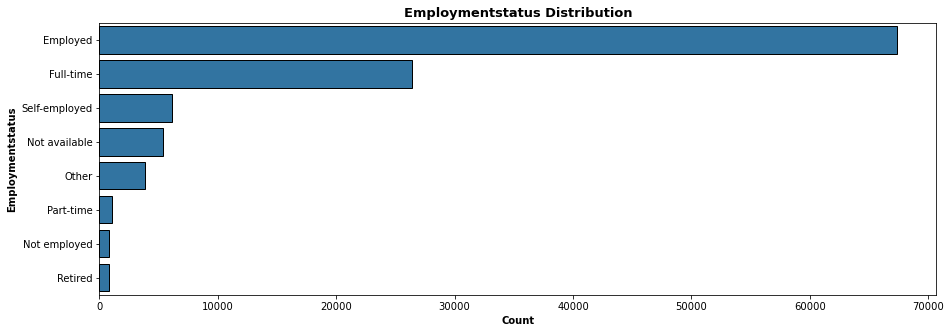

In [65]:
# creating an order for the plot 
orders=loan.EmploymentStatus.value_counts().index
# using the y function to plot the distribution
count_yplot(loan,'EmploymentStatus',order=orders)

* from the employment status distribution, one could see that majority of individuals that applied for the loans are employed and about 70000, while the least individuals are retired


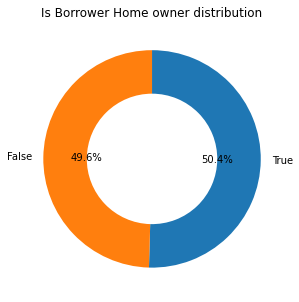

In [66]:
# getting a doughnut plot for the homeowner distribution
counts=loan.IsBorrowerHomeowner.value_counts()
 # setting the fig size for ploting
plt.figure(figsize = [15, 5])
plt.pie(counts, labels = counts.index,autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Is Borrower Home owner distribution");

* The Borrower Homeowner plot shows an almost even distribution between borrowers who have a home and do not.
* This implies that home ownership might not have a significant effect on getting a loan.

In [67]:
# top 20 occupations of the borrowers
loan.Occupation.value_counts()[:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

* Several borrowers did not fill in their occupations, and the data available here is not enough to make a valid conclusion on the highest number of occupations receiving loans.

In [68]:
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

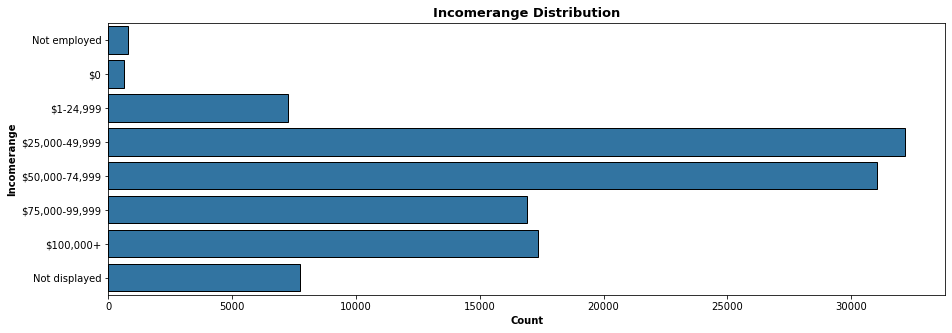

In [69]:
# creating an order for the plot IncomeRange 
income_orders=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
# using the function count_yplot for ploting
count_yplot(loan,'IncomeRange',order=income_orders)

* Large numbers of the borrowers are of the income range 25,000 - 74,999 range

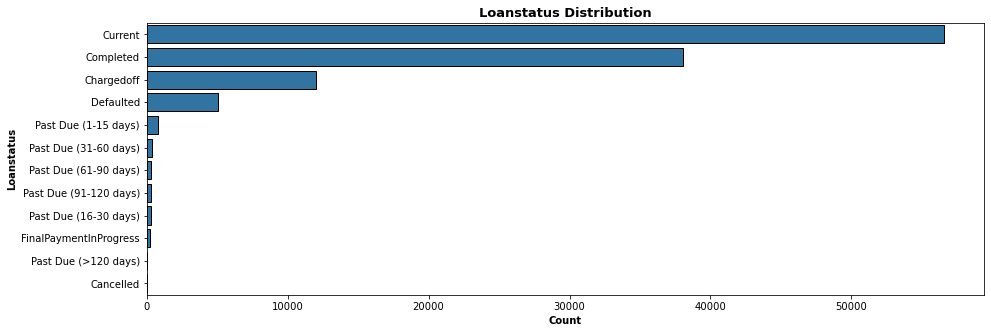

In [70]:
# creating an order for the plot IncomeRange 
orders=loan.LoanStatus.value_counts().index
# using count plot for the Loan status distribution
count_yplot(loan,'LoanStatus',order=orders)

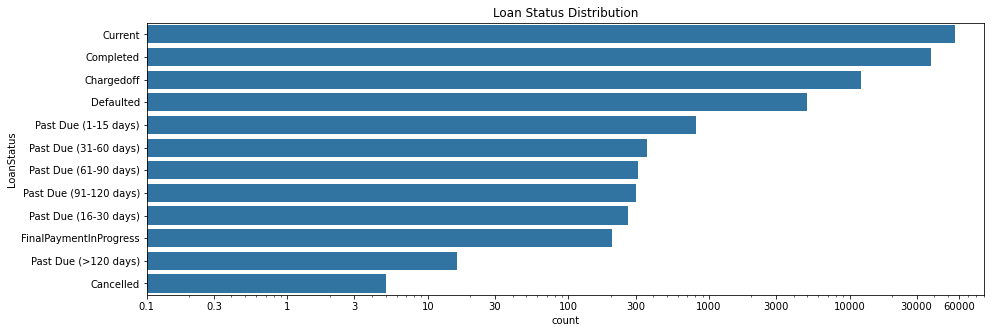

In [71]:
# ploting the fig size using a log scale to make my plot more distributed
plt.figure(figsize=[15,5])
colour= sb.color_palette()[0]
# creating an order for the plot LoanStatus 
orders=loan.LoanStatus.value_counts().index
# creating tick marks
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000,60000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
# using count plot for the IncomeRange status distribution
sb.countplot(data= loan,y= 'LoanStatus',color=colour,order=orders);
plt.title("Loan Status Distribution");
# using a log scale to show 
plt.xscale('log');
plt.xticks(ticks, labels);


*From the distribution using the log scale, the borrowers who are currently on the loan plan are the highest, followed by those who have completed the loan.

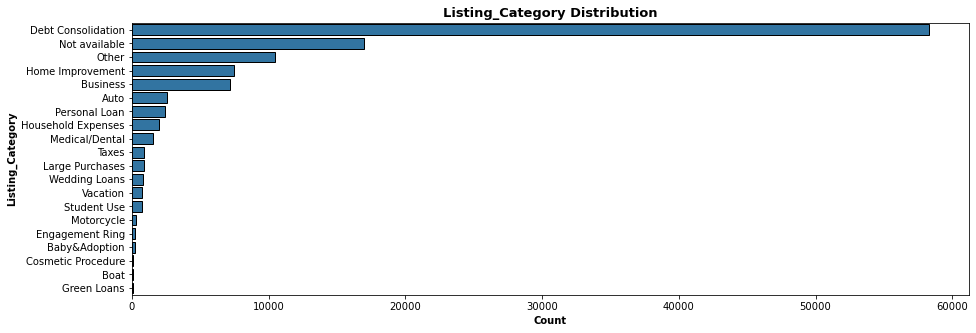

In [72]:
orders= loan.Listing_category.value_counts()[:20].index
# plotting for the reason for getting loans
count_yplot(loan,'Listing_category',order=orders)

* The distributon shows that a very large amount about 60000 get the loans for debt consolidation  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The BorrowerAPR is multimodal with an unusual spike around about 0.4 percent, i have to use the log transformation to get a better insight into the plot. Also, the Borrowerintrest had a similar trend with the BorrowerAPR, which I think is normal because the  interest rate plus other expense fees like mortgage make up the BorrowerAPR. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the distributions were normal, I had to use a log function in my scaling to stop the distribution from being skewed to a particular side, also I change the listing category from number to it variable using loops for better representation of the data set.

## Bivariate Exploration


### What is the average borrower APR distribution by year ?

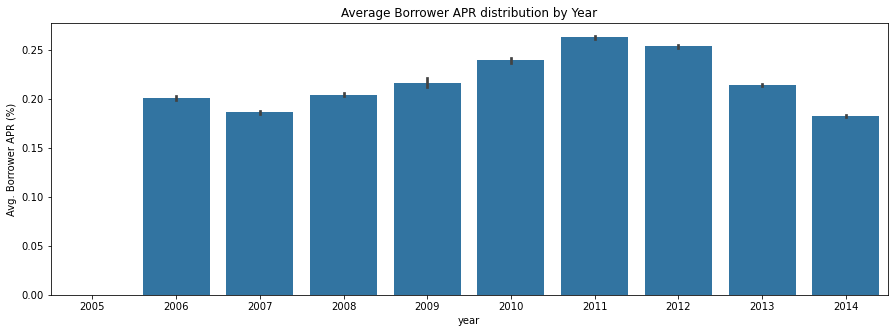

In [73]:
# creating a column for the years  form the loan original date column
loan['year']= loan['LoanOriginationDate'].dt.year
plt.figure(figsize = [15, 5])
# creating a bar plot to show the average borrower Apr distribution by year.
sb.barplot(data=loan,x='year',y='BorrowerAPR',color=colour);
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Year');

*  This distribution shows that 2006 had 0.2% with a slight fall to 2007 and a gradual increase till 2011 which was the highest APR % rate about 0.25%. A steady fall occurred from 2012 to 2014. 

### What is the average borrower APR distribution by Month ?

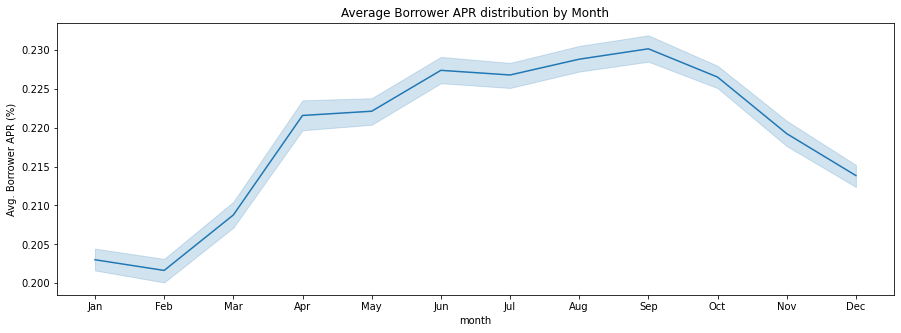

In [74]:
# creating month column
loan['month']= loan['LoanOriginationDate'].dt.strftime('%b')
# setting order categories by month
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# ordering it into a categorical type data
set_m = pd.api.types.CategoricalDtype(ordered=True, categories=month)
# setting it into the prosper rating
loan['month'] = loan['month'].astype(set_m)
plt.figure(figsize = [15, 5])
# creating a line plot to show the distribution
sb.lineplot(data=loan,x='month',y='BorrowerAPR');
plt.ylabel('Avg. Borrower APR (%)');
plt.title('Average Borrower APR distribution by Month');

* The API had a gradual increase over the month with a steady decline from september to december

### BorrowerAPR distribution by Month

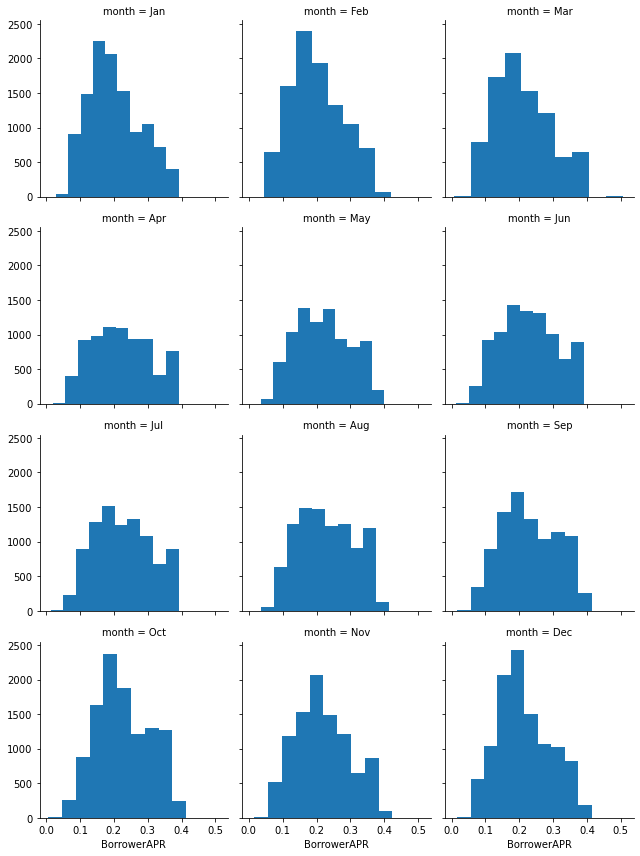

In [75]:

m=sb.FacetGrid(data=loan,col_wrap=3, col='month');
m.map(plt.hist,'BorrowerAPR');


* The distribution shows that the months like January, February, October, November, and December which had lower APR on the line chart above had more peak periods than other months. 

### Do Prosper Rating  and Prosper Score affect Borrower APR ?

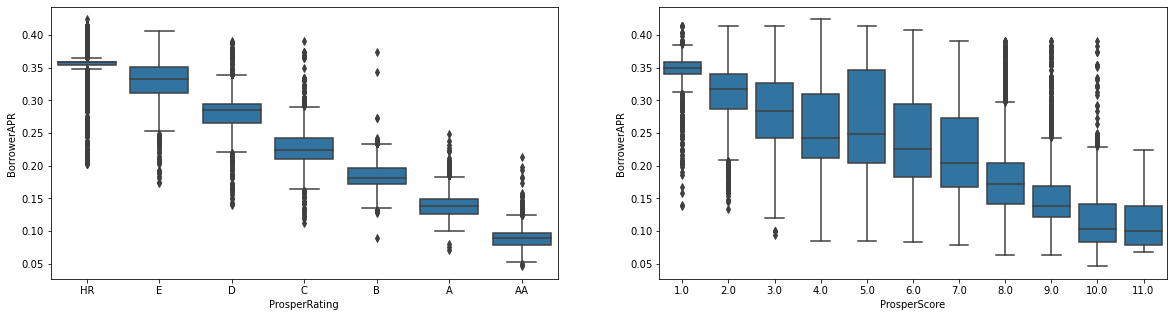

In [76]:
# ploting fig size
plt.figure(figsize=[20,5])
# stating the position of the plot
plt.subplot(1,2,1)
# setting a box plot to show the distribution 
sb.boxplot(data=loan, x='ProsperRating', y='BorrowerAPR', color=colour);
# stating the position of the second plot
plt.subplot(1,2,2)
#setting a box plot for the Scores distribution
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', color=colour);

* The observation from the plots shows that the higher the ratings, the lower the borrower APR. That means to have a good rating, ones APR must be below 0.1%


### What are the correlations between BorrowerAPR','BorrowerRate','LoanOriginalAmount, and Prosper Score

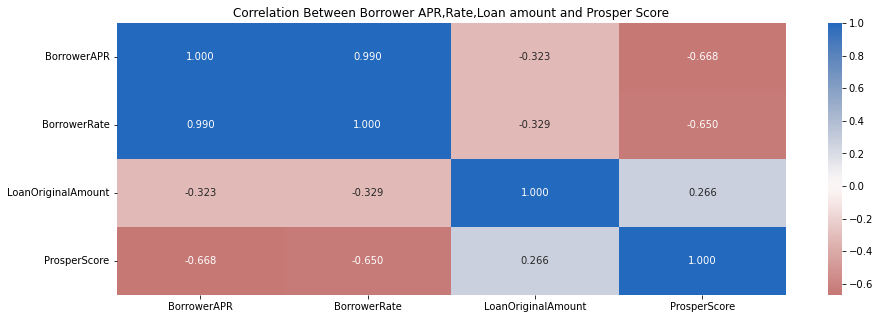

In [77]:
# seting all the column into a list
number_va=['BorrowerAPR','BorrowerRate','LoanOriginalAmount','ProsperScore']
# correlation plot
plt.figure(figsize = [15, 5])
sb.heatmap(loan[number_va].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Between Borrower APR,Rate,Loan amount and Prosper Score');

* The correlation coefficient indicate that the borrower rate and Apr have positive correlation meaning that the rise in one vale leads to the rise in the other
* the Loan amount is has a weak correlation with the borrowers rate and API.
* However, the Prosper Score shows a moderatly strong negative relationship with Borrower APR and Borrower  rate

### DO Loan amount affect Borrowers API

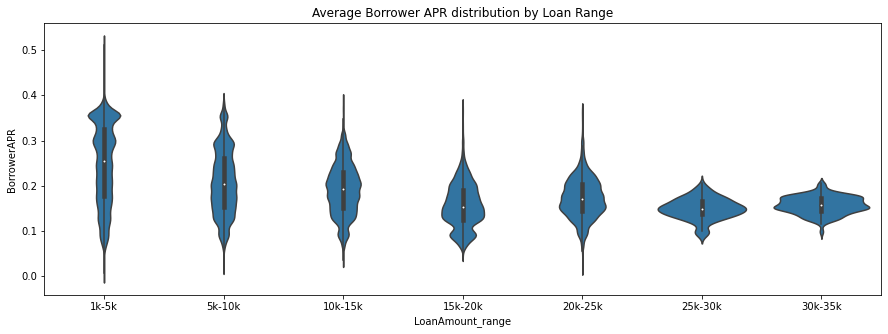

In [78]:
# using the .cut function to create a new column for loan amount range
loan['LoanAmount_range']=pd.cut(loan.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
plt.figure(figsize = [15, 5])
# plotting the violinplot
sb.violinplot(data=loan, x='LoanAmount_range', y='BorrowerAPR', color=colour);
plt.title('Average Borrower APR distribution by Loan Range');

* Although the higher range has a lower mean borrower rate the mean fluctuates throughout the income range.

### What is the relationship Between Income Range and Homeowner

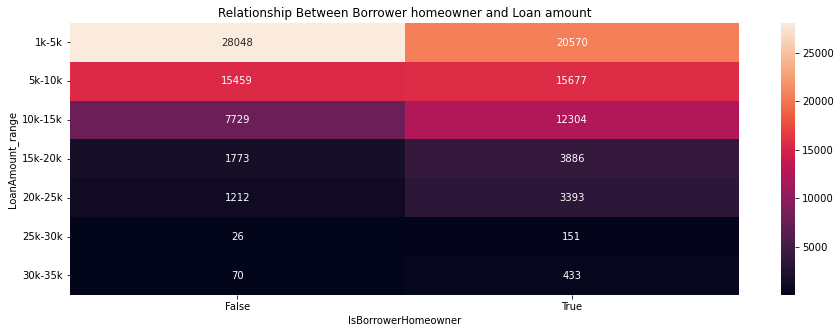

In [79]:
# first i use the group by statement to group the varaibles
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).size()
# used the .index to set it into a data frame
group=group.reset_index(name='count')
# pivoted the data set
plt.figure(figsize = [15, 5])
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'count')
# draw a heat map for the distribution
sb.heatmap(group,annot = True, fmt = 'd');
plt.title('Relationship Between Borrower homeowner and Loan amount');

* The distribution show that majority of the individals collect loans within 10k range below
* Also,within 15k above the borrowers who had homes dominated the disribution in collecting higher loans

###  How is the Loan amount been distributed by the Term? 

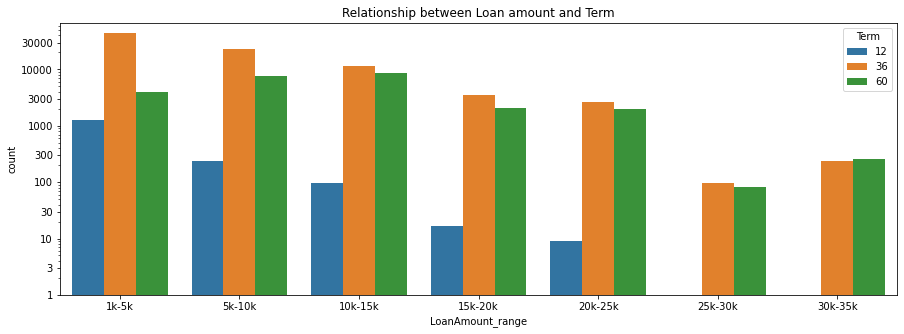

In [80]:
# using a count plot to get the distribution
plt.figure(figsize = [15, 5])
sb.countplot(data=loan,x='LoanAmount_range',hue='Term');
# setting the ticks since i am using the log scale
ticks = [ 1, 3, 10, 30, 100, 300, 1000,3000,10000,30000]
# setting the labels
labels = ['{}'.format(v) for v in ticks]
# setting the count scale to log
plt.yscale('log');
# ploting the count ticks
plt.yticks(ticks, labels);
plt.title('Relationship between Loan amount and Term');

* The plot shows that 36 term which is 3 years was the highest distribution for all the amount collected except for the 30k upward, which had the 60 term that 5 years slightly higher.
* Only a few borrowers collected loans for one year, and for the higher loan from 25k no individual collected the loan for a single year term.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The distribution shows that the APR mean values were within the 0.2 range, with 2011 being the month with the highest APR rate. Also, the month with lower API shows a high borrower count and vice versa. However, there was not much correlation with the loan amount, and the majority of the homeowners dominated the amount range distribution. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The majority of the loans were collected for 3 years and above. With a gradual increase in loan amount being collected, the borrower count decreased. However, the borrowers who had homes dominated the higher amount range of loan collected than those who did not.

## Multivariate Exploration



### How does the Borrower APR affect the loan and Homeownership

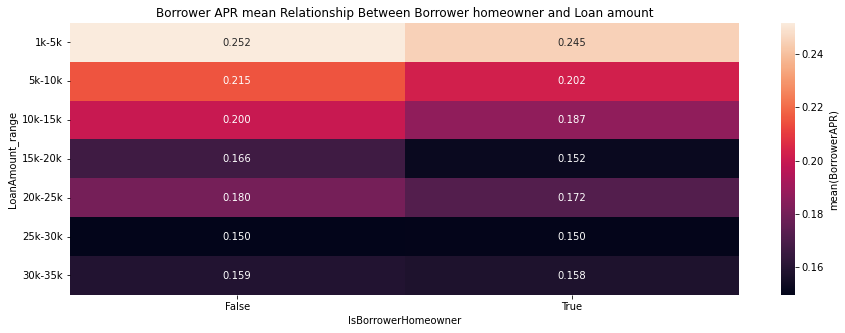

In [81]:
# adding the borrower APR to the chat
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount');

* The borrowers APR had no effect on the home owner relationship. Although, the loan amount had an inverse relationship with borrower APR.

### Does the term have a significance effect on  the loan and APR

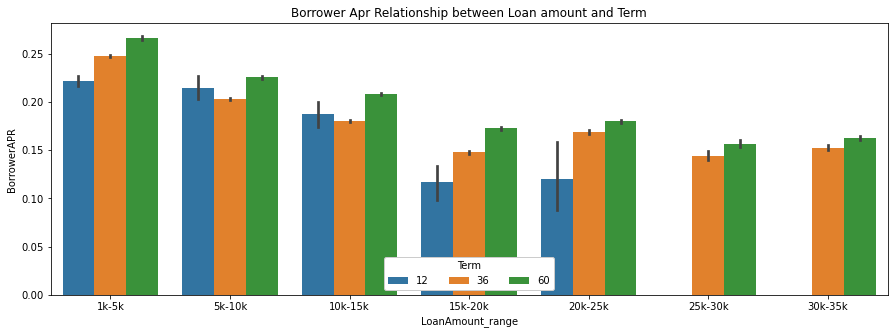

In [82]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5])
yx=sb.barplot(data=loan,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term");

* The trend shows that the longer term(5 years) had higher borrower APR. which means the longer the term the individual collect the loan the higher their API gets.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The first multivariate showed that the higher the API, the lower the loan  collected and the homeowner had no influence on the loan amount range. However, using the term shows the longer the term which loan was collected no matter the amount, the higher the APR gets. 

### Were there any interesting or surprising interactions between features?

> The loan term had a significant effect on how higher the borrower's APR gets. Also, the lower the borrower APR, the higher the ratings.

## Conclusions
>To conclude, the borrower APR had the same trend as the Borrowers rate. From the exploration of the loan, the data set reveals that the higher the ratings, the lower the borrower's APR, and collecting loans for a longer period will increase their borrower's APR. Most loans were collected for 3 years and the borrowers APR mean where mostly within 0.2%.
> n addition, the homeowner distribution was almost even, and of the population who collected the highest loans, the homeowners dominated the range. Overall the borrower's APR will be crucial to consider when given out loans.
